# Neural Network for VO2max prediction

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, normalize
from keras.layers import Dense, LSTM, Dropout
from keras.optimizers import Adam, SGD
from keras.models import Sequential
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import svm
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from numpy import mean, std, absolute


In [23]:
# import dataset using pandas and convert to array for processing
dataset = pd.read_csv('Data.csv')
dataset

,Height,Weight,Age,Gender,EE,HRmax,VO2max
0,188.0,78.4,32,M,17.580220,163.500000,44.847500
1,175.0,59.0,22,F,14.239469,189.400000,48.269388
2,170.0,58.1,23,F,12.081421,162.700000,41.588370
3,168.5,54.0,30,F,12.164488,182.300000,45.053660
4,191.0,98.6,30,M,19.572100,198.537406,39.700000
5,178.0,63.0,26,F,13.341879,154.300000,42.355170
6,176.7,82.0,27,M,16.079811,199.800000,39.219050
7,177.4,66.3,29,F,14.250177,151.200000,42.986960
8,162.6,57.3,25,F,11.789054,173.354021,41.148530
9,178.0,89.2,27,M,19.162771,186.564176,42.965854


In [24]:
# train dataset (omit variables for different number of predictor variables) Independent variables
train = dataset[['Height', 'Weight', 'Age','Gender','EE','HRmax']].values
train.shape
train

array([[188.0, 78.4, 32, 'M', 17.58022, 163.5],
       [175.0, 59.0, 22, 'F', 14.23946939, 189.4],
       [170.0, 58.1, 23, 'F', 12.08142149, 162.7],
       [168.5, 54.0, 30, 'F', 12.1644882, 182.3],
       [191.0, 98.6, 30, 'M', 19.5721, 198.5374064],
       [178.0, 63.0, 26, 'F', 13.34187855, 154.3],
       [176.7, 82.0, 27, 'M', 16.0798105, 199.8],
       [177.4, 66.3, 29, 'F', 14.25017724, 151.2],
       [162.6, 57.3, 25, 'F', 11.78905385, 173.35402130000003],
       [178.0, 89.2, 27, 'M', 19.16277073, 186.5641757],
       [174.0, 67.5, 22, 'F', 12.91275, 168.46162980000003],
       [179.8, 73.9, 29, 'M', 15.81077937, 156.57106069999998],
       [179.0, 79.0, 29, 'M', 16.50274845, 190.9],
       [168.8, 78.3, 23, 'F', 13.01552712, 175.84343909999998],
       [175.1, 72.4, 29, 'F', 17.75458552, 188.66200569999998],
       [182.0, 77.0, 34, 'M', 16.912102899999997, 188.8450593],
       [187.5, 85.5, 34, 'M', 18.14679788, 152.75951630000003],
       [164.8, 85.6, 30, 'M', 16.344036, 1

In [25]:
# Test data set - Dependent Variable
test = dataset[['VO2max']].values
test

array([[44.8475    ],
       [48.26938776],
       [41.58837   ],
       [45.05366   ],
       [39.7       ],
       [42.35517   ],
       [39.21905   ],
       [42.98696   ],
       [41.14853   ],
       [42.96585366],
       [38.26      ],
       [42.78966   ],
       [41.77911   ],
       [33.24528   ],
       [45.29231   ],
       [43.92754   ],
       [42.44865   ],
       [38.187     ]])

In [26]:
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column (Column Gender) 1 - Males, 0 - Females
train[:,3] = np.array(labelencoder.fit_transform(train[:,3]))
train
train = normalize(train)


In [27]:
# split into test train 
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size = 0.2, random_state = None) # splits data randomly everytime 
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

In [ ]:
##### Neural Network with 1 hidden, 1 input and 1 output layer 5000 epoch batch size 10
model = Sequential() # 
model.add(Dense(32 , kernel_initializer='normal', activation = 'elu', input_shape = (train.shape[1],)))
model.add(Dense(16, activation= 'elu', kernel_initializer='normal'))
model.add(Dense(1, activation='linear'))
opt=Adam(learning_rate=0.02)
model.compile(optimizer = opt, loss = 'mean_squared_error')
model.fit(x = X_train, y = y_train, epochs = 5000, batch_size=17,validation_data=(X_test, y_test))

Epoch 1/5000
1/1 [==============================] - 0s 134ms/step - loss: 1802.9320 - val_loss: 1623.6331
Epoch 2/5000
1/1 [==============================] - 0s 21ms/step - loss: 1780.0739 - val_loss: 1594.0541
Epoch 3/5000
1/1 [==============================] - 0s 20ms/step - loss: 1749.3932 - val_loss: 1552.3357
Epoch 4/5000
1/1 [==============================] - 0s 22ms/step - loss: 1706.0463 - val_loss: 1497.6838
Epoch 5/5000
1/1 [==============================] - 0s 24ms/step - loss: 1649.1619 - val_loss: 1430.7646
Epoch 6/5000
1/1 [==============================] - 0s 22ms/step - loss: 1579.3889 - val_loss: 1353.1813
Epoch 7/5000
1/1 [==============================] - 0s 24ms/step - loss: 1498.3457 - val_loss: 1266.8528
Epoch 8/5000
1/1 [==============================] - 0s 22ms/step - loss: 1407.9877 - val_loss: 1173.3894
Epoch 9/5000
1/1 [==============================] - 0s 25ms/step - loss: 1309.9592 - val_loss: 1073.5817
Epoch 10/5000
1/1 [==============================] - 0

1/1 [==============================] - 0s 25ms/step - loss: 12.5731 - val_loss: 7.7680
Epoch 82/5000
1/1 [==============================] - 0s 27ms/step - loss: 12.4500 - val_loss: 6.9109
Epoch 83/5000
1/1 [==============================] - 0s 27ms/step - loss: 12.4250 - val_loss: 6.2293
Epoch 84/5000
1/1 [==============================] - 0s 23ms/step - loss: 12.4780 - val_loss: 5.7302
Epoch 85/5000
1/1 [==============================] - 0s 23ms/step - loss: 12.5721 - val_loss: 5.4023
Epoch 86/5000
1/1 [==============================] - 0s 22ms/step - loss: 12.6669 - val_loss: 5.2274
Epoch 87/5000
1/1 [==============================] - 0s 23ms/step - loss: 12.7297 - val_loss: 5.1880
Epoch 88/5000
1/1 [==============================] - 0s 26ms/step - loss: 12.7431 - val_loss: 5.2707
Epoch 89/5000
1/1 [==============================] - 0s 27ms/step - loss: 12.7068 - val_loss: 5.4657
Epoch 90/5000
1/1 [==============================] - 0s 23ms/step - loss: 12.6346 - val_loss: 5.7623
Epoc

1/1 [==============================] - 0s 22ms/step - loss: 12.2253 - val_loss: 6.9511
Epoch 162/5000
1/1 [==============================] - 0s 21ms/step - loss: 12.2223 - val_loss: 6.9360
Epoch 163/5000
1/1 [==============================] - 0s 24ms/step - loss: 12.2194 - val_loss: 6.9191
Epoch 164/5000
1/1 [==============================] - 0s 25ms/step - loss: 12.2164 - val_loss: 6.9018
Epoch 165/5000
1/1 [==============================] - 0s 20ms/step - loss: 12.2134 - val_loss: 6.8858
Epoch 166/5000
1/1 [==============================] - 0s 22ms/step - loss: 12.2105 - val_loss: 6.8724
Epoch 167/5000
1/1 [==============================] - 0s 23ms/step - loss: 12.2076 - val_loss: 6.8623
Epoch 168/5000
1/1 [==============================] - 0s 26ms/step - loss: 12.2047 - val_loss: 6.8560
Epoch 169/5000
1/1 [==============================] - 0s 22ms/step - loss: 12.2017 - val_loss: 6.8536
Epoch 170/5000
1/1 [==============================] - 0s 20ms/step - loss: 12.1987 - val_loss: 6.

Epoch 241/5000
1/1 [==============================] - 0s 19ms/step - loss: 11.9665 - val_loss: 6.6538
Epoch 242/5000
1/1 [==============================] - 0s 21ms/step - loss: 11.9629 - val_loss: 6.6505
Epoch 243/5000
1/1 [==============================] - 0s 21ms/step - loss: 11.9594 - val_loss: 6.6473
Epoch 244/5000
1/1 [==============================] - 0s 19ms/step - loss: 11.9558 - val_loss: 6.6441
Epoch 245/5000
1/1 [==============================] - 0s 18ms/step - loss: 11.9522 - val_loss: 6.6409
Epoch 246/5000
1/1 [==============================] - 0s 19ms/step - loss: 11.9487 - val_loss: 6.6377
Epoch 247/5000
1/1 [==============================] - 0s 18ms/step - loss: 11.9451 - val_loss: 6.6343
Epoch 248/5000
1/1 [==============================] - 0s 19ms/step - loss: 11.9415 - val_loss: 6.6310
Epoch 249/5000
1/1 [==============================] - 0s 17ms/step - loss: 11.9379 - val_loss: 6.6275
Epoch 250/5000
1/1 [==============================] - 0s 18ms/step - loss: 11.9343

1/1 [==============================] - 0s 18ms/step - loss: 11.6583 - val_loss: 6.3655
Epoch 322/5000
1/1 [==============================] - 0s 18ms/step - loss: 11.6541 - val_loss: 6.3617
Epoch 323/5000
1/1 [==============================] - 0s 17ms/step - loss: 11.6500 - val_loss: 6.3579
Epoch 324/5000
1/1 [==============================] - 0s 20ms/step - loss: 11.6458 - val_loss: 6.3541
Epoch 325/5000
1/1 [==============================] - 0s 20ms/step - loss: 11.6416 - val_loss: 6.3502
Epoch 326/5000
1/1 [==============================] - 0s 18ms/step - loss: 11.6374 - val_loss: 6.3464
Epoch 327/5000
1/1 [==============================] - 0s 18ms/step - loss: 11.6332 - val_loss: 6.3426
Epoch 328/5000
1/1 [==============================] - 0s 17ms/step - loss: 11.6290 - val_loss: 6.3388
Epoch 329/5000
1/1 [==============================] - 0s 20ms/step - loss: 11.6248 - val_loss: 6.3350
Epoch 330/5000
1/1 [==============================] - 0s 17ms/step - loss: 11.6205 - val_loss: 6.

1/1 [==============================] - 0s 18ms/step - loss: 11.2983 - val_loss: 6.0480
Epoch 402/5000
1/1 [==============================] - 0s 18ms/step - loss: 11.2934 - val_loss: 6.0438
Epoch 403/5000
1/1 [==============================] - 0s 17ms/step - loss: 11.2885 - val_loss: 6.0397
Epoch 404/5000
1/1 [==============================] - 0s 17ms/step - loss: 11.2836 - val_loss: 6.0355
Epoch 405/5000
1/1 [==============================] - 0s 18ms/step - loss: 11.2787 - val_loss: 6.0314
Epoch 406/5000
1/1 [==============================] - 0s 18ms/step - loss: 11.2738 - val_loss: 6.0272
Epoch 407/5000
1/1 [==============================] - 0s 18ms/step - loss: 11.2689 - val_loss: 6.0231
Epoch 408/5000
1/1 [==============================] - 0s 17ms/step - loss: 11.2640 - val_loss: 6.0189
Epoch 409/5000
1/1 [==============================] - 0s 17ms/step - loss: 11.2590 - val_loss: 6.0147
Epoch 410/5000
1/1 [==============================] - 0s 17ms/step - loss: 11.2541 - val_loss: 6.

1/1 [==============================] - 0s 17ms/step - loss: 10.8746 - val_loss: 5.7029
Epoch 482/5000
1/1 [==============================] - 0s 18ms/step - loss: 10.8688 - val_loss: 5.6984
Epoch 483/5000
1/1 [==============================] - 0s 18ms/step - loss: 10.8630 - val_loss: 5.6939
Epoch 484/5000
1/1 [==============================] - 0s 20ms/step - loss: 10.8572 - val_loss: 5.6894
Epoch 485/5000
1/1 [==============================] - 0s 20ms/step - loss: 10.8514 - val_loss: 5.6849
Epoch 486/5000
1/1 [==============================] - 0s 18ms/step - loss: 10.8455 - val_loss: 5.6804
Epoch 487/5000
1/1 [==============================] - 0s 19ms/step - loss: 10.8397 - val_loss: 5.6759
Epoch 488/5000
1/1 [==============================] - 0s 18ms/step - loss: 10.8338 - val_loss: 5.6714
Epoch 489/5000
1/1 [==============================] - 0s 18ms/step - loss: 10.8279 - val_loss: 5.6668
Epoch 490/5000
1/1 [==============================] - 0s 16ms/step - loss: 10.8220 - val_loss: 5.

1/1 [==============================] - 0s 18ms/step - loss: 10.3636 - val_loss: 5.3294
Epoch 562/5000
1/1 [==============================] - 0s 18ms/step - loss: 10.3565 - val_loss: 5.3246
Epoch 563/5000
1/1 [==============================] - 0s 17ms/step - loss: 10.3494 - val_loss: 5.3197
Epoch 564/5000
1/1 [==============================] - 0s 20ms/step - loss: 10.3422 - val_loss: 5.3149
Epoch 565/5000
1/1 [==============================] - 0s 17ms/step - loss: 10.3351 - val_loss: 5.3100
Epoch 566/5000
1/1 [==============================] - 0s 18ms/step - loss: 10.3279 - val_loss: 5.3052
Epoch 567/5000
1/1 [==============================] - 0s 18ms/step - loss: 10.3207 - val_loss: 5.3003
Epoch 568/5000
1/1 [==============================] - 0s 19ms/step - loss: 10.3135 - val_loss: 5.2954
Epoch 569/5000
1/1 [==============================] - 0s 18ms/step - loss: 10.3062 - val_loss: 5.2905
Epoch 570/5000
1/1 [==============================] - 0s 20ms/step - loss: 10.2990 - val_loss: 5.

Epoch 642/5000
1/1 [==============================] - 0s 18ms/step - loss: 9.7130 - val_loss: 4.9264
Epoch 643/5000
1/1 [==============================] - 0s 20ms/step - loss: 9.7038 - val_loss: 4.9214
Epoch 644/5000
1/1 [==============================] - 0s 18ms/step - loss: 9.6946 - val_loss: 4.9163
Epoch 645/5000
1/1 [==============================] - 0s 17ms/step - loss: 9.6854 - val_loss: 4.9113
Epoch 646/5000
1/1 [==============================] - 0s 20ms/step - loss: 9.6761 - val_loss: 4.9062
Epoch 647/5000
1/1 [==============================] - 0s 17ms/step - loss: 9.6668 - val_loss: 4.9011
Epoch 648/5000
1/1 [==============================] - 0s 18ms/step - loss: 9.6575 - val_loss: 4.8961
Epoch 649/5000
1/1 [==============================] - 0s 18ms/step - loss: 9.6481 - val_loss: 4.8910
Epoch 650/5000
1/1 [==============================] - 0s 17ms/step - loss: 9.6387 - val_loss: 4.8860
Epoch 651/5000
1/1 [==============================] - 0s 17ms/step - loss: 9.6293 - val_los

1/1 [==============================] - 0s 19ms/step - loss: 8.8394 - val_loss: 4.5289
Epoch 724/5000
1/1 [==============================] - 0s 18ms/step - loss: 8.8265 - val_loss: 4.5244
Epoch 725/5000
1/1 [==============================] - 0s 20ms/step - loss: 8.8135 - val_loss: 4.5199
Epoch 726/5000
1/1 [==============================] - 0s 17ms/step - loss: 8.8005 - val_loss: 4.5154
Epoch 727/5000
1/1 [==============================] - 0s 17ms/step - loss: 8.7874 - val_loss: 4.5110
Epoch 728/5000
1/1 [==============================] - 0s 17ms/step - loss: 8.7743 - val_loss: 4.5066
Epoch 729/5000
1/1 [==============================] - 0s 18ms/step - loss: 8.7610 - val_loss: 4.5022
Epoch 730/5000
1/1 [==============================] - 0s 17ms/step - loss: 8.7477 - val_loss: 4.4978
Epoch 731/5000
1/1 [==============================] - 0s 19ms/step - loss: 8.7344 - val_loss: 4.4934
Epoch 732/5000
1/1 [==============================] - 0s 19ms/step - loss: 8.7209 - val_loss: 4.4891
Epoch

1/1 [==============================] - 0s 17ms/step - loss: 7.6170 - val_loss: 4.3211
Epoch 805/5000
1/1 [==============================] - 0s 23ms/step - loss: 7.5997 - val_loss: 4.3214
Epoch 806/5000
1/1 [==============================] - 0s 20ms/step - loss: 7.5823 - val_loss: 4.3219
Epoch 807/5000
1/1 [==============================] - 0s 17ms/step - loss: 7.5648 - val_loss: 4.3224
Epoch 808/5000
1/1 [==============================] - 0s 18ms/step - loss: 7.5473 - val_loss: 4.3231
Epoch 809/5000
1/1 [==============================] - 0s 17ms/step - loss: 7.5297 - val_loss: 4.3239
Epoch 810/5000
1/1 [==============================] - 0s 17ms/step - loss: 7.5121 - val_loss: 4.3247
Epoch 811/5000
1/1 [==============================] - 0s 19ms/step - loss: 7.4943 - val_loss: 4.3257
Epoch 812/5000
1/1 [==============================] - 0s 17ms/step - loss: 7.4765 - val_loss: 4.3268
Epoch 813/5000
1/1 [==============================] - 0s 17ms/step - loss: 7.4586 - val_loss: 4.3281
Epoch

1/1 [==============================] - 0s 21ms/step - loss: 6.0163 - val_loss: 4.8446
Epoch 886/5000
1/1 [==============================] - 0s 18ms/step - loss: 5.9952 - val_loss: 4.8588
Epoch 887/5000
1/1 [==============================] - 0s 18ms/step - loss: 5.9741 - val_loss: 4.8731
Epoch 888/5000
1/1 [==============================] - 0s 19ms/step - loss: 5.9531 - val_loss: 4.8876
Epoch 889/5000
1/1 [==============================] - 0s 19ms/step - loss: 5.9322 - val_loss: 4.9022
Epoch 890/5000
1/1 [==============================] - 0s 20ms/step - loss: 5.9112 - val_loss: 4.9171
Epoch 891/5000
1/1 [==============================] - 0s 18ms/step - loss: 5.8903 - val_loss: 4.9320
Epoch 892/5000
1/1 [==============================] - 0s 20ms/step - loss: 5.8695 - val_loss: 4.9472
Epoch 893/5000
1/1 [==============================] - 0s 17ms/step - loss: 5.8488 - val_loss: 4.9625
Epoch 894/5000
1/1 [==============================] - 0s 18ms/step - loss: 5.8281 - val_loss: 4.9780
Epoch

1/1 [==============================] - 0s 19ms/step - loss: 4.4276 - val_loss: 6.5320
Epoch 967/5000
1/1 [==============================] - 0s 18ms/step - loss: 4.4101 - val_loss: 6.5582
Epoch 968/5000
1/1 [==============================] - 0s 17ms/step - loss: 4.3927 - val_loss: 6.5844
Epoch 969/5000
1/1 [==============================] - 0s 17ms/step - loss: 4.3754 - val_loss: 6.6107
Epoch 970/5000
1/1 [==============================] - 0s 18ms/step - loss: 4.3582 - val_loss: 6.6370
Epoch 971/5000
1/1 [==============================] - 0s 19ms/step - loss: 4.3411 - val_loss: 6.6633
Epoch 972/5000
1/1 [==============================] - 0s 20ms/step - loss: 4.3240 - val_loss: 6.6897
Epoch 973/5000
1/1 [==============================] - 0s 17ms/step - loss: 4.3070 - val_loss: 6.7161
Epoch 974/5000
1/1 [==============================] - 0s 17ms/step - loss: 4.2902 - val_loss: 6.7425
Epoch 975/5000
1/1 [==============================] - 0s 18ms/step - loss: 4.2734 - val_loss: 6.7690
Epoch

1/1 [==============================] - 0s 17ms/step - loss: 3.3296 - val_loss: 8.3129
Epoch 1047/5000
1/1 [==============================] - 0s 17ms/step - loss: 3.3195 - val_loss: 8.3266
Epoch 1048/5000
1/1 [==============================] - 0s 17ms/step - loss: 3.3095 - val_loss: 8.3401
Epoch 1049/5000
1/1 [==============================] - 0s 19ms/step - loss: 3.2996 - val_loss: 8.3534
Epoch 1050/5000
1/1 [==============================] - 0s 18ms/step - loss: 3.2898 - val_loss: 8.3664
Epoch 1051/5000
1/1 [==============================] - 0s 18ms/step - loss: 3.2800 - val_loss: 8.3791
Epoch 1052/5000
1/1 [==============================] - 0s 18ms/step - loss: 3.2703 - val_loss: 8.3915
Epoch 1053/5000
1/1 [==============================] - 0s 17ms/step - loss: 3.2607 - val_loss: 8.4036
Epoch 1054/5000
1/1 [==============================] - 0s 18ms/step - loss: 3.2512 - val_loss: 8.4154
Epoch 1055/5000
1/1 [==============================] - 0s 18ms/step - loss: 3.2417 - val_loss: 8.4

1/1 [==============================] - 0s 19ms/step - loss: 2.7021 - val_loss: 8.5345
Epoch 1127/5000
1/1 [==============================] - 0s 18ms/step - loss: 2.6957 - val_loss: 8.5281
Epoch 1128/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.6894 - val_loss: 8.5216
Epoch 1129/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.6830 - val_loss: 8.5149
Epoch 1130/5000
1/1 [==============================] - 0s 17ms/step - loss: 2.6767 - val_loss: 8.5081
Epoch 1131/5000
1/1 [==============================] - 0s 17ms/step - loss: 2.6704 - val_loss: 8.5012
Epoch 1132/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.6641 - val_loss: 8.4941
Epoch 1133/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.6579 - val_loss: 8.4869
Epoch 1134/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.6516 - val_loss: 8.4796
Epoch 1135/5000
1/1 [==============================] - 0s 17ms/step - loss: 2.6454 - val_loss: 8.4

1/1 [==============================] - 0s 19ms/step - loss: 2.2303 - val_loss: 7.7332
Epoch 1207/5000
1/1 [==============================] - 0s 18ms/step - loss: 2.2248 - val_loss: 7.7208
Epoch 1208/5000
1/1 [==============================] - 0s 18ms/step - loss: 2.2192 - val_loss: 7.7084
Epoch 1209/5000
1/1 [==============================] - 0s 17ms/step - loss: 2.2136 - val_loss: 7.6960
Epoch 1210/5000
1/1 [==============================] - 0s 18ms/step - loss: 2.2081 - val_loss: 7.6835
Epoch 1211/5000
1/1 [==============================] - 0s 18ms/step - loss: 2.2025 - val_loss: 7.6710
Epoch 1212/5000
1/1 [==============================] - 0s 18ms/step - loss: 2.1970 - val_loss: 7.6584
Epoch 1213/5000
1/1 [==============================] - 0s 17ms/step - loss: 2.1914 - val_loss: 7.6458
Epoch 1214/5000
1/1 [==============================] - 0s 17ms/step - loss: 2.1859 - val_loss: 7.6332
Epoch 1215/5000
1/1 [==============================] - 0s 17ms/step - loss: 2.1803 - val_loss: 7.6

1/1 [==============================] - 0s 17ms/step - loss: 1.7985 - val_loss: 6.6697
Epoch 1287/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.7933 - val_loss: 6.6558
Epoch 1288/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.7881 - val_loss: 6.6419
Epoch 1289/5000
1/1 [==============================] - 0s 18ms/step - loss: 1.7828 - val_loss: 6.6281
Epoch 1290/5000
1/1 [==============================] - 0s 17ms/step - loss: 1.7776 - val_loss: 6.6142
Epoch 1291/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.7724 - val_loss: 6.6003
Epoch 1292/5000
1/1 [==============================] - 0s 18ms/step - loss: 1.7672 - val_loss: 6.5864
Epoch 1293/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.7621 - val_loss: 6.5724
Epoch 1294/5000
1/1 [==============================] - 0s 17ms/step - loss: 1.7569 - val_loss: 6.5585
Epoch 1295/5000
1/1 [==============================] - 0s 17ms/step - loss: 1.7517 - val_loss: 6.5

1/1 [==============================] - 0s 17ms/step - loss: 1.3994 - val_loss: 5.5511
Epoch 1367/5000
1/1 [==============================] - 0s 18ms/step - loss: 1.3947 - val_loss: 5.5372
Epoch 1368/5000
1/1 [==============================] - 0s 17ms/step - loss: 1.3900 - val_loss: 5.5233
Epoch 1369/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.3853 - val_loss: 5.5094
Epoch 1370/5000
1/1 [==============================] - 0s 18ms/step - loss: 1.3806 - val_loss: 5.4956
Epoch 1371/5000
1/1 [==============================] - 0s 17ms/step - loss: 1.3760 - val_loss: 5.4817
Epoch 1372/5000
1/1 [==============================] - 0s 17ms/step - loss: 1.3713 - val_loss: 5.4678
Epoch 1373/5000
1/1 [==============================] - 0s 17ms/step - loss: 1.3667 - val_loss: 5.4539
Epoch 1374/5000
1/1 [==============================] - 0s 17ms/step - loss: 1.3620 - val_loss: 5.4401
Epoch 1375/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.3574 - val_loss: 5.4

1/1 [==============================] - 0s 18ms/step - loss: 1.0548 - val_loss: 4.4742
Epoch 1447/5000
1/1 [==============================] - 0s 17ms/step - loss: 1.0509 - val_loss: 4.4613
Epoch 1448/5000
1/1 [==============================] - 0s 17ms/step - loss: 1.0471 - val_loss: 4.4486
Epoch 1449/5000
1/1 [==============================] - 0s 17ms/step - loss: 1.0433 - val_loss: 4.4358
Epoch 1450/5000
1/1 [==============================] - 0s 18ms/step - loss: 1.0395 - val_loss: 4.4230
Epoch 1451/5000
1/1 [==============================] - 0s 17ms/step - loss: 1.0357 - val_loss: 4.4103
Epoch 1452/5000
1/1 [==============================] - 0s 17ms/step - loss: 1.0319 - val_loss: 4.3975
Epoch 1453/5000
1/1 [==============================] - 0s 17ms/step - loss: 1.0281 - val_loss: 4.3848
Epoch 1454/5000
1/1 [==============================] - 0s 16ms/step - loss: 1.0244 - val_loss: 4.3722
Epoch 1455/5000
1/1 [==============================] - 0s 17ms/step - loss: 1.0206 - val_loss: 4.3

1/1 [==============================] - 0s 19ms/step - loss: 0.7901 - val_loss: 3.5260
Epoch 1527/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.7874 - val_loss: 3.5152
Epoch 1528/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7846 - val_loss: 3.5047
Epoch 1529/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.7819 - val_loss: 3.4939
Epoch 1530/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.7792 - val_loss: 3.4834
Epoch 1531/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.7766 - val_loss: 3.4728
Epoch 1532/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.7739 - val_loss: 3.4622
Epoch 1533/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.7712 - val_loss: 3.4518
Epoch 1534/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.7686 - val_loss: 3.4412
Epoch 1535/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.7660 - val_loss: 3.4

1/1 [==============================] - 0s 17ms/step - loss: 0.6154 - val_loss: 2.7767
Epoch 1607/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.6137 - val_loss: 2.7688
Epoch 1608/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.6121 - val_loss: 2.7608
Epoch 1609/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.6105 - val_loss: 2.7530
Epoch 1610/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.6089 - val_loss: 2.7451
Epoch 1611/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.6073 - val_loss: 2.7374
Epoch 1612/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.6057 - val_loss: 2.7295
Epoch 1613/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.6041 - val_loss: 2.7219
Epoch 1614/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.6025 - val_loss: 2.7139
Epoch 1615/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.6010 - val_loss: 2.7

1/1 [==============================] - 0s 17ms/step - loss: 0.5319 - val_loss: 2.4960
Epoch 1687/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.5388 - val_loss: 2.1610
Epoch 1688/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.5354 - val_loss: 2.3498
Epoch 1689/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.5275 - val_loss: 2.3767
Epoch 1690/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.5279 - val_loss: 2.1599
Epoch 1691/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.5322 - val_loss: 2.4257
Epoch 1692/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.5299 - val_loss: 2.2473
Epoch 1693/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.5244 - val_loss: 2.2326
Epoch 1694/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.5241 - val_loss: 2.4028
Epoch 1695/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.5267 - val_loss: 2.1

1/1 [==============================] - 0s 17ms/step - loss: 0.4828 - val_loss: 2.0295
Epoch 1767/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.4824 - val_loss: 2.0257
Epoch 1768/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.4820 - val_loss: 2.0201
Epoch 1769/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.4816 - val_loss: 2.0214
Epoch 1770/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.4812 - val_loss: 2.0127
Epoch 1771/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.4808 - val_loss: 2.0147
Epoch 1772/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.4804 - val_loss: 2.0077
Epoch 1773/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.4800 - val_loss: 2.0063
Epoch 1774/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.4796 - val_loss: 2.0036
Epoch 1775/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.4792 - val_loss: 1.9

1/1 [==============================] - 0s 18ms/step - loss: 0.4578 - val_loss: 1.8139
Epoch 1847/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.4576 - val_loss: 1.8218
Epoch 1848/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.4573 - val_loss: 1.8071
Epoch 1849/5000
1/1 [==============================] - 0s 19ms/step - loss: 0.4571 - val_loss: 1.8210
Epoch 1850/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.4569 - val_loss: 1.7985
Epoch 1851/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.4567 - val_loss: 1.8228
Epoch 1852/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.4565 - val_loss: 1.7866
Epoch 1853/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.4563 - val_loss: 1.8292
Epoch 1854/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.4562 - val_loss: 1.7689
Epoch 1855/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.4561 - val_loss: 1.8

1/1 [==============================] - 0s 17ms/step - loss: 0.4501 - val_loss: 1.6443
Epoch 1927/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.4488 - val_loss: 1.7371
Epoch 1928/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.4471 - val_loss: 1.7348
Epoch 1929/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.4470 - val_loss: 1.6533
Epoch 1930/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.4480 - val_loss: 1.7809
Epoch 1931/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.4484 - val_loss: 1.6591
Epoch 1932/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.4475 - val_loss: 1.7277
Epoch 1933/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.4465 - val_loss: 1.7287
Epoch 1934/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.4464 - val_loss: 1.6636
Epoch 1935/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.4469 - val_loss: 1.7

In [ ]:
print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=10) 
print("test loss, test acc:", results)

In [ ]:
# Predict VO2max values for test set
y_pred = model.predict(X_test)
y_pred

In [ ]:
#Visualising the Actual and predicted Result
plt.plot(y_test, color = 'green', label = 'Actual')
plt.plot(y_pred, color = 'blue', label = 'Predicted')
plt.xlabel('Sample Number ')
plt.ylabel('VO2max')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [ ]:
print("mean squared error: ", mean_squared_error(y_test, y_pred)) #compute MSE
print("r_square score: ", r2_score(y_test, y_pred)) # compute R2 score (accuracy for regression tasks or continuous data)

In [ ]:
train_error =  np.abs(y_test - y_pred)
mean_error = np.mean(train_error)
min_error = np.min(train_error)
max_error = np.max(train_error)
std_error = np.std(train_error)
print("std_error: ",std_error)
print("mean_error: ",mean_error)
print("min_error: ",min_error)
print("max_error: ",max_error)

# Linear Regression Model

In [13]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
y_pred

array([[45.65393 ],
       [42.117645],
       [41.790955],
       [39.124268]], dtype=float32)

In [14]:
train_error =  np.abs(y_test - y_pred)
mean_error = np.mean(train_error)
min_error = np.min(train_error)
max_error = np.max(train_error)
std_error = np.std(train_error)
print("std_error: ",std_error)
print("mean_error: ",mean_error)
print("min_error: ",min_error)
print("max_error: ",max_error)

std_error:  0.80272084
mean_error:  1.2465639
min_error:  0.5642166
max_error:  2.6154556


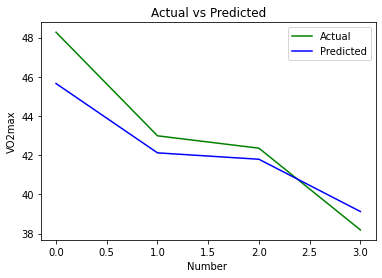

In [15]:
#Visualising the Acutal and predicted Result
plt.plot(y_test, color = 'green', label = 'Actual')
plt.plot(y_pred, color = 'blue', label = 'Predicted')
plt.xlabel('Number ')
plt.ylabel('VO2max')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [16]:
print("mean squared error: ", mean_squared_error(y_test, y_pred))# compute MSE
print("r_square score: ", r2_score(y_test, y_pred))

mean squared error:  2.1982822
r_square score:  0.8287182606435048


# Support Vector Machine

In [17]:
regressor = svm.SVR(kernel="linear", C=100, gamma="auto")
regressor.fit(X_train, y_train.ravel())

SVR(C=100, gamma='auto', kernel='linear')

In [18]:
y_pred = regressor.predict(X_test)
y_pred

array([41.46393981, 42.34240013, 42.17595063, 41.41945807])

In [19]:
train_error =  np.abs(y_test - y_pred)
mean_error = np.mean(train_error)
min_error = np.min(train_error)
max_error = np.max(train_error)
std_error = np.std(train_error)
print("std_error: ",std_error)
print("mean_error: ",mean_error)
print("min_error: ",min_error)
print("max_error: ",max_error)

std_error:  2.37130093650393
mean_error:  2.9309110662345237
min_error:  0.012771077115985463
max_error:  6.849928216699794


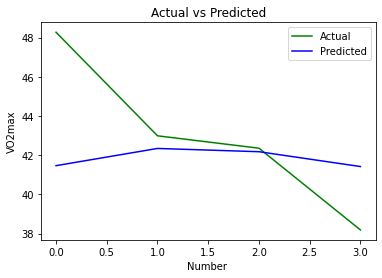

In [20]:
#Visualising the Acutal and predicted Result
plt.plot(y_test, color = 'green', label = 'Actual')
plt.plot(y_pred, color = 'blue', label = 'Predicted')
plt.xlabel('Number ')
plt.ylabel('VO2max')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [21]:
print("mean squared error: ", mean_squared_error(y_test, y_pred))# compute MSE
print("r_square score: ", r2_score(y_test, y_pred))

mean squared error:  14.302616108761107
r_square score:  -0.1144051066546441
